In [1]:
library(readr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data <- read_csv("PenyebabKebakaranJakarta.csv")
message = FALSE 
print(data)

Rows: 216 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): wilayah, penyebab
dbl (2): tahun, jumlah


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 216 × 4
   tahun wilayah          penyebab        jumlah
   <dbl> <chr>            <chr>            <dbl>
 1  2015 Kepulauan Seribu Listrik              1
 2  2015 Kepulauan Seribu Gas                  0
 3  2015 Kepulauan Seribu Lilin                0
 4  2015 Kepulauan Seribu Membakar Sampah      0
 5  2015 Kepulauan Seribu Rokok                0
 6  2015 Kepulauan Seribu Lainnya              7
 7  2015 Jakarta Selatan  Listrik            221
 8  2015 Jakarta Selatan  Gas                 22
 9  2015 Jakarta Selatan  Lilin                0
10  2015 Jakarta Selatan  Membakar Sampah      0
# … with 206 more rows


In [3]:
data$tahun <- as.factor(data$tahun)
data$wilayah <- as.factor(data$wilayah)
data$penyebab <- as.factor(data$penyebab)
print(data)

# A tibble: 216 × 4
   tahun wilayah          penyebab        jumlah
   <fct> <fct>            <fct>            <dbl>
 1 2015  Kepulauan Seribu Listrik              1
 2 2015  Kepulauan Seribu Gas                  0
 3 2015  Kepulauan Seribu Lilin                0
 4 2015  Kepulauan Seribu Membakar Sampah      0
 5 2015  Kepulauan Seribu Rokok                0
 6 2015  Kepulauan Seribu Lainnya              7
 7 2015  Jakarta Selatan  Listrik            221
 8 2015  Jakarta Selatan  Gas                 22
 9 2015  Jakarta Selatan  Lilin                0
10 2015  Jakarta Selatan  Membakar Sampah      0
# … with 206 more rows


In [4]:
sapply(data, function(x) sum(is.na(x)))

tahun  wilayah penyebab   jumlah 
       0        0        0        0

In [5]:
pertahun <- aggregate(jumlah~tahun, data, sum)

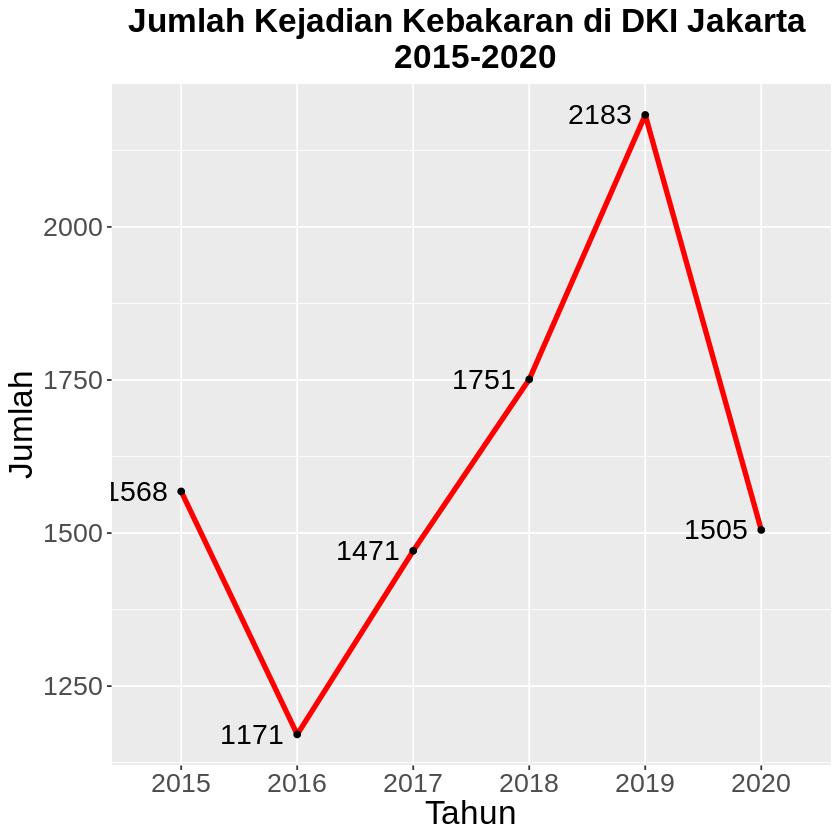

In [6]:
ggplot(pertahun, aes(x=tahun,y=jumlah,group=1)) +
  geom_line(stat='identity',color='red',size=1.5) + 
  geom_point() +
  geom_text(aes(label=jumlah),hjust=1.2, color="black", size=6, parse=TRUE) +
  ggtitle("Jumlah Kejadian Kebakaran di DKI Jakarta \n 2015-2020") +
  labs(x='Tahun',y='Jumlah') +
  theme(plot.title = element_text(hjust = 0.5,size=20,face='bold'),text = element_text(size=20)) 

In [7]:
trend <- data %>%
          group_by(tahun,penyebab) %>%
          summarise(jumlah = sum(jumlah)) 

`summarise()` has grouped output by 'tahun'. You can override using the `.groups` argument.



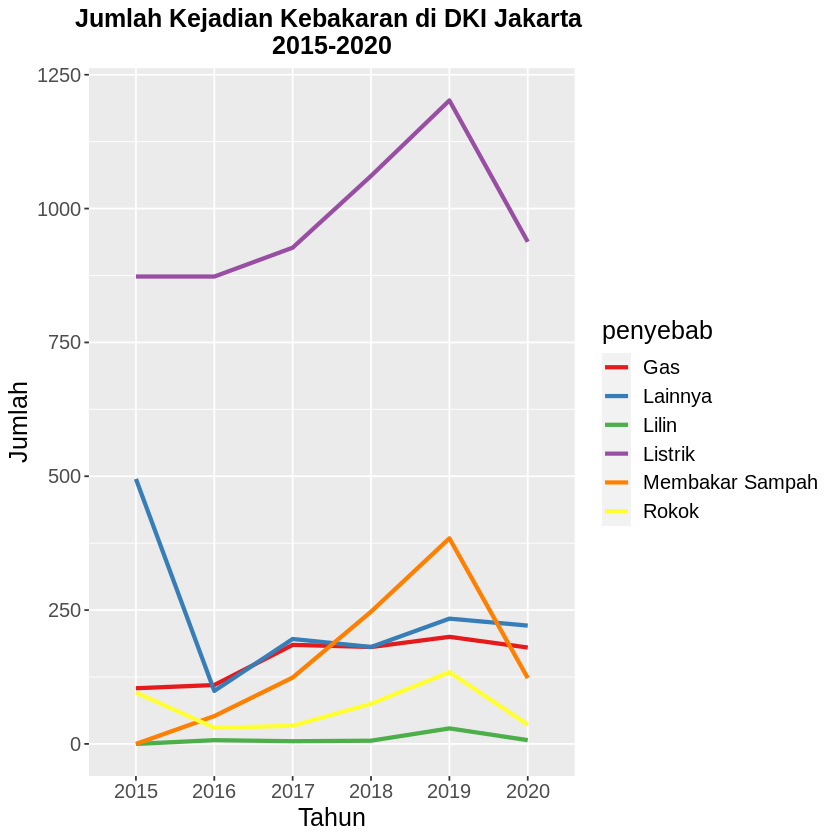

In [8]:
ggplot(trend,aes(x = tahun, y = jumlah, colour = penyebab, group = penyebab)) +
  geom_line(size=1.2) +
  ggtitle("Jumlah Kejadian Kebakaran di DKI Jakarta \n2015-2020") +
  labs(x='Tahun',y='Jumlah') +
  theme(plot.title = element_text(hjust = 0.5,size=15,face='bold'),text = element_text(size=15)) +
  scale_colour_brewer(palette="Set1")

In [9]:
penyebab <- aggregate(jumlah~penyebab, data, sum)

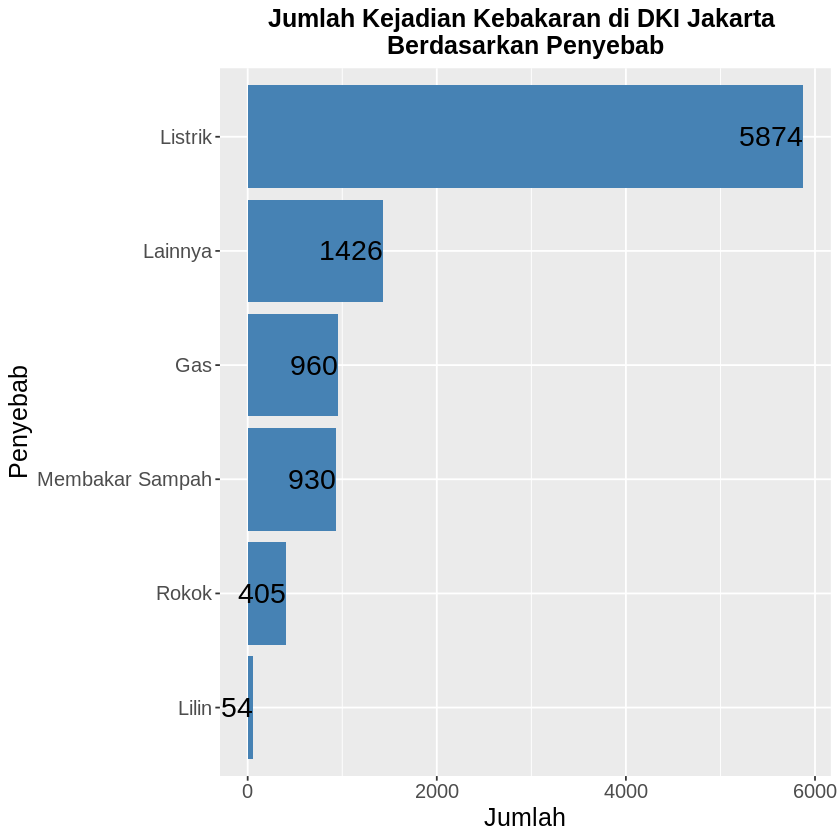

In [10]:
ggplot(penyebab, aes(x=reorder(penyebab,jumlah),y=jumlah)) +
  geom_bar(stat="identity", fill='steelblue') +
  geom_text(aes(label=jumlah),hjust=1, color="black", size=6, parse=TRUE) +
  ggtitle("Jumlah Kejadian Kebakaran di DKI Jakarta \nBerdasarkan Penyebab") +
  labs(x='Penyebab',y='Jumlah') +
  theme(plot.title = element_text(hjust = 0.5,size=15,face='bold'),text = element_text(size=15)) +
  coord_flip()

In [11]:
wilayah <- aggregate(jumlah~wilayah,data,sum)

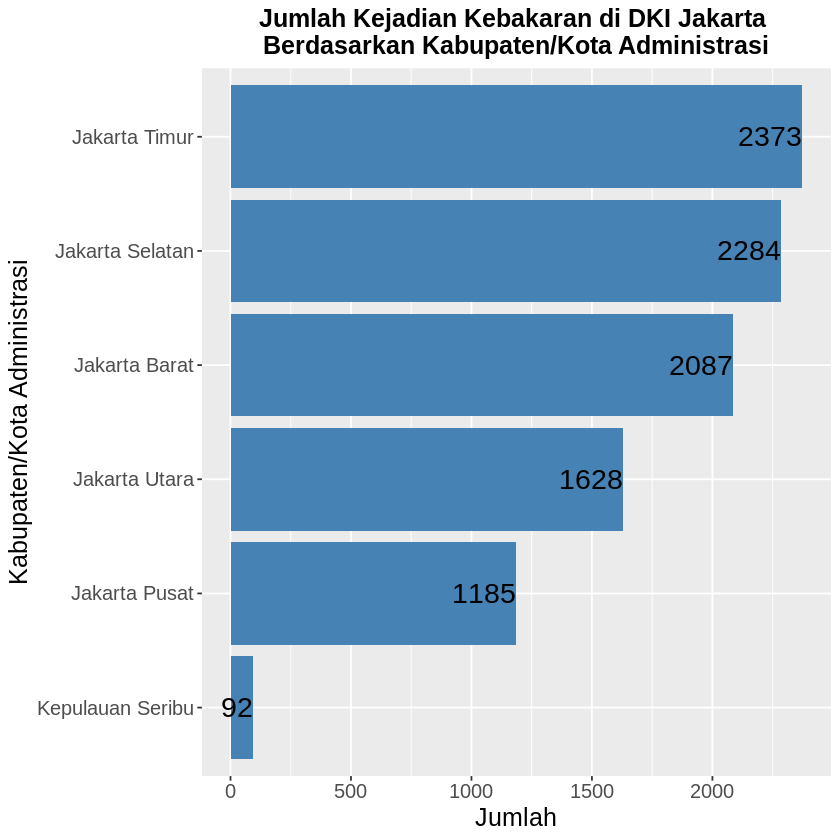

In [12]:
ggplot(wilayah, aes(x=reorder(wilayah,jumlah),y=jumlah)) +
  geom_bar(stat="identity", fill='steelblue') +
  geom_text(aes(label=jumlah),hjust=1, color="black", size=6, parse=TRUE) +
  ggtitle("Jumlah Kejadian Kebakaran di DKI Jakarta \nBerdasarkan Kabupaten/Kota Administrasi") +
  labs(x='Kabupaten/Kota Administrasi',y='Jumlah') +
  theme(plot.title = element_text(hjust = 0.5,size=15,face='bold'),text = element_text(size=15)) +
  coord_flip()

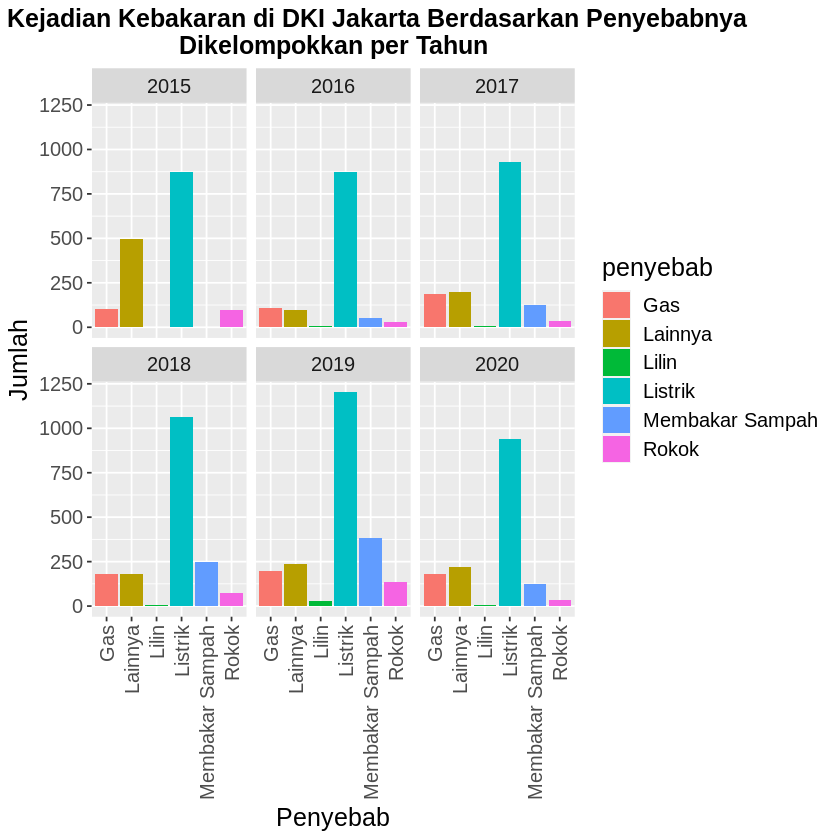

In [13]:
ggplot(data, aes(x=penyebab,y=jumlah,fill=penyebab)) +
  geom_bar(stat="identity") +
  ggtitle("Jumlah Kejadian Kebakaran di DKI Jakarta Berdasarkan Penyebabnya \nDikelompokkan per Tahun") +
  labs(x='Penyebab',y='Jumlah') +
  theme(plot.title = element_text(hjust=0.5,size=15,face='bold'),axis.text.x=element_text(angle = 90,vjust = 0.5, hjust=1),text = element_text(size=15)) + 
  facet_wrap(~tahun)

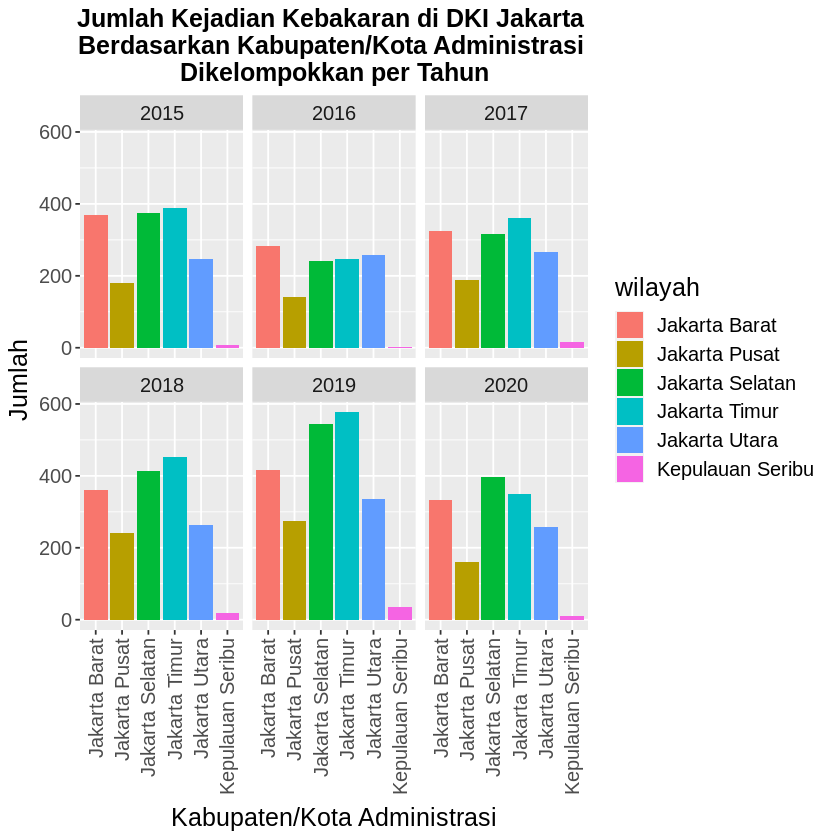

In [14]:
ggplot(data, aes(x=wilayah,y=jumlah,fill=wilayah)) +
  geom_bar(stat="identity") +
  ggtitle("Jumlah Kejadian Kebakaran di DKI Jakarta \nBerdasarkan Kabupaten/Kota Administrasi \nDikelompokkan per Tahun") +
  labs(x='Kabupaten/Kota Administrasi',y='Jumlah') +
  theme(plot.title = element_text(hjust=0.5,size=15,face='bold'),axis.text.x=element_text(angle = 90,vjust = 0.5, hjust=1),text = element_text(size=15)) + 
  facet_wrap(~tahun) 